In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from LLS import LLs
from scipy import stats

In [92]:
def generate_data():
    # x study hours 
    X = np.round(np.random.uniform(0, 8 , 1000),2)
    # y grade

    Y = np.round (2*X + np.random.normal(0,2,1000) + 2 ,2)
    # Y = np.round(np.abs(Y), 2)
    return X,Y 

[ 4.63  5.18 10.74 19.74  8.02 15.69  3.29 18.35  5.97  2.83 13.88 12.12
  8.96 10.09 13.75 15.65  7.47 16.84 17.37 14.78 10.48 15.89 11.42  0.92
  1.27 14.15  7.97  7.14  6.39  3.21 20.17 15.11 14.82  3.56 14.36 14.96
 11.53  3.29 10.14  1.27  7.13 11.64  9.53  6.79  7.29  5.89  9.34 19.21
 15.44  0.16  4.73  7.14 15.47  7.43 12.62  0.88  2.94 18.92 15.68  4.44
  6.86  9.01  4.24  8.82  2.43 18.53 14.89 17.75  4.46  6.4   4.95 10.6
 17.26  3.37 12.1   4.02  1.24  3.58  5.43 16.51  6.94  2.5  13.1  18.27
  8.68 14.22  9.25 12.36 14.29  8.09  1.31  7.55  3.59  7.9   7.37 13.05
 17.17 11.71  0.81  2.46  8.35  1.64  3.32 13.46  7.18 13.5   9.59  6.26
 16.15  6.43 12.9   7.8   4.74  5.64  8.93  2.51 12.05  5.38 16.02  5.26
  5.75 11.36  4.88 15.62 14.43  6.44 13.03 13.92 11.17 19.81 11.71  6.71
  6.86 13.95  3.18  8.92  1.67 18.94 12.01  3.52  8.79  9.68  2.69 12.18
 15.05 11.64 10.41 11.79 10.77  8.77 12.32 10.63  6.31 11.05 19.05 -0.36
 12.31 15.16  5.99  8.27 21.75 13.84 15.06 12.62  4.

Text(0, 0.5, 'Grades')

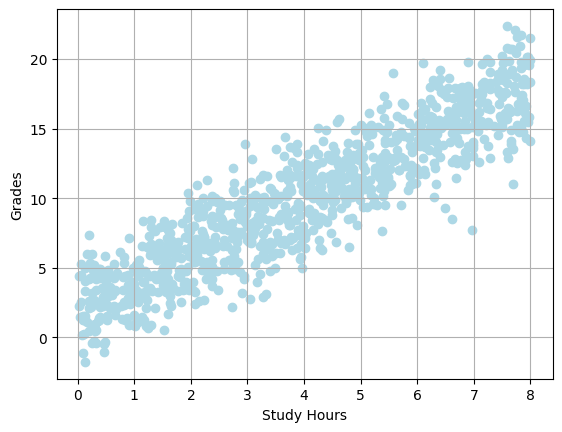

In [93]:
X, Y = generate_data()
print(Y)
plt.scatter(X,Y, c = "lightblue")
plt.grid(True)
# X = X.reshape(-1, 1)
# Y = Y.reshape(-1, 1)
plt.xlabel("Study Hours")
plt.ylabel("Grades")
# print("Study hours are:" , "\n" , X)
# print("Grades are:" , "\n" , Y)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .8)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train.shape

(800, 1)

In [89]:
lls = LLs()
lls.fit(X_train, y_train)
y_pred = lls.predict(X_test)


In [95]:
slope, intercept, r, p, std_err = stats.linregress(X, Y)


array([ 2.50571804,  2.52579998, 11.32169135, 17.04504532,  6.0200582 ,
       11.22128163,  6.12046791, 16.78398005,  5.39751794,  3.73071661,
       11.82373994, 11.70324828, 10.13685666,  8.57046505, 11.02046219,
       13.45037738, 10.94013441, 13.47045933, 15.67947314, 14.45447457,
        9.51431641, 13.28972183, 11.803658  ,  2.52579998,  2.68645553,
       14.27373708,  9.93603723,  5.85940264,  8.67087477,  2.46555415,
       17.88848695, 17.00488143, 12.36595242,  4.51391241, 14.33398291,
       15.75980092, 12.64709963,  4.77497768, 11.38193718,  2.96760274,
       10.016365  ,  9.47415252,  7.56636786,  9.17292336,  7.64669564,
        6.1606318 ,  9.83562751, 14.81594956, 14.85611345,  2.08399722,
        7.70694147,  5.11637073, 17.9085689 ,  8.51021922, 12.66718158,
        3.75079855,  3.79096244, 17.22578281, 15.03685094,  5.49792766,
        8.53030116,  9.39382475,  3.22866801,  7.86759702,  3.79096244,
       16.84422588, 14.59504818, 15.88029258,  5.57825543, 10.55

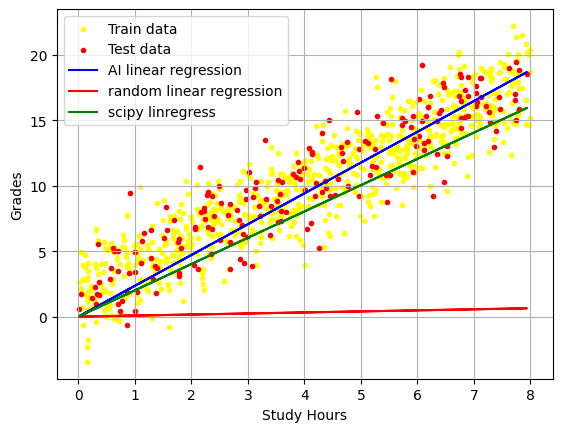

In [99]:
plt.scatter(X_train, y_train, marker='.', c = "yellow" )
plt.scatter(X_test, y_test, marker='.', c ="red" )
plt.plot(X_test , y_pred , color='blue')
plt.plot(X_test , X_test * 0.08 , color='red')
plt.plot(X_test, slope * X_test , color='green')

plt.xlabel("Study Hours")
plt.ylabel("Grades")
plt.legend(["Train data", "Test data", "AI linear regression", "random linear regression", "scipy linregress " ], loc="upper left")
plt.grid()
plt.show()